# Exercise 3.2: Tree Maps, Area and Stacked Area Charts
#### Anuj Tanwar
#### DSC640 - 01/11/2023

# Plots Using **Python**

## Load Data

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import squarify

In [2]:
# Load data
unempDF = pd.read_csv('ex3-2/ex3-3/unemployement-rate-1948-2010.csv')
expenDF = pd.read_csv('ex3-2/ex3-3/expenditures.txt',sep='\t')

In [3]:
unempDF.head()

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5


In [4]:
expenDF.head()

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1


<div style="page-break-after: always;"></div>

## Area Chart

In [5]:
# Convert Month numbers to Month names
monthDict = {"M01": "Jan", "M02": "Feb", "M03": "Mar", 
             "M04": "Apr", "M05": "May", "M06": "Jun", 
             "M07": "Jul", "M08": "Aug", "M09": "Sep", 
             "M10": "Oct", "M11": "Nov", "M12": "Dec"}
unempDF.replace({"Period": monthDict}, inplace=True)

# Combine Month and Year columns to a single datetime column
unempDF["MoYr"] = pd.to_datetime(unempDF.Period + ' ' + unempDF.Year.astype(str))

In [6]:
# Select data
x = unempDF.MoYr
y = unempDF.Value

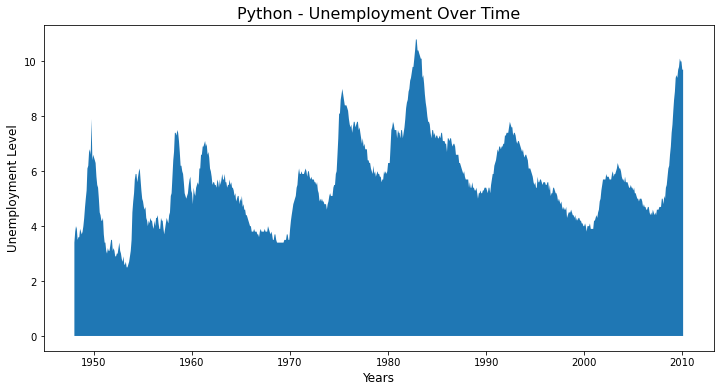

In [7]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 6))

# Plot Area Chart
plt.fill_between(x, y)

# Add chart title and labels
plt.title("Python - Unemployment Over Time", fontsize = 16)
plt.xlabel("Years",fontsize=12)
plt.ylabel("Unemployment Level",fontsize=12)

plt.show()

In [8]:
# Save cleaned data to csv
unempDF.to_csv('unemployment_cleaned.csv', index=False)

<div style="page-break-after: always;"></div>

## Stacked Area Chart

In [9]:
# Pivot dataframe into category expenditures by year
pivotDF = expenDF.pivot(index='year', columns='category')['expenditure']

# Get list of top 5 categories
sortedAvg = pivotDF.mean().sort_values(ascending=False)
topFiveCat = sortedAvg[:5].index.tolist()

# Select Data for chart
x = pivotDF.index
y0 = pivotDF[topFiveCat[0]]
y1 = pivotDF[topFiveCat[1]]
y2 = pivotDF[topFiveCat[2]]
y3 = pivotDF[topFiveCat[3]]
y4 = pivotDF[topFiveCat[4]]

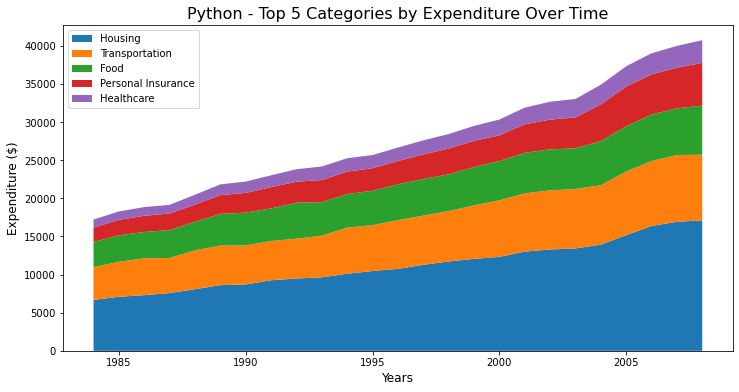

In [10]:
# Plot Stacked Area Chart

f, ax = plt.subplots(figsize=(12, 6))

plt.stackplot(x, y0, y1, y2, y3, y4, labels=topFiveCat)
plt.legend(loc='upper left')

plt.title("Python - Top 5 Categories by Expenditure Over Time", fontsize = 16)
plt.xlabel("Years",fontsize = 12)
plt.ylabel("Expenditure ($)",fontsize = 12)

plt.show()

## Tree Map

In [11]:
# Group expenses by category
expenCat = expenDF.groupby('category').sum()

# Set up values for chart
size = expenCat.expenditure
labels = expenCat.index

In [12]:
# Set up color palette
cmap = matplotlib.cm.bwr 
mini = min(size)
maxi = max(size)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in size]

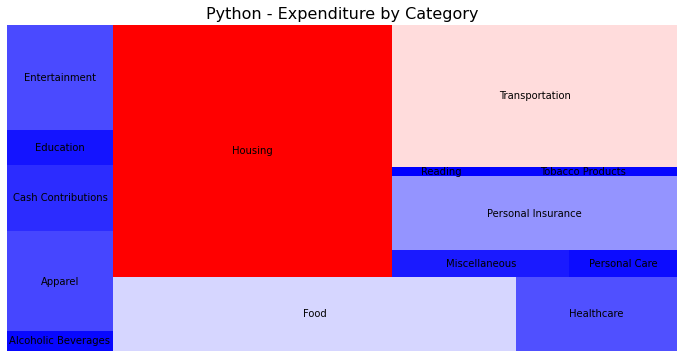

In [13]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 6))

# Plot tree map using squarify and matplotlib
squarify.plot(sizes = size, 
              label = labels, 
              alpha = 1, 
              color = colors)
plt.axis('off')

# Add chart title
plt.title("Python - Expenditure by Category", fontsize = 16)

plt.show()